# Instalation of the dataset

In [1]:
# Primero, instala la librería de Kaggle si no está instalada
!pip install kaggle

# Sube el archivo kaggle.json a tu entorno y configura el acceso a la API
import os
from google.colab import files

# Subir el archivo kaggle.json desde tu computadora
uploaded = files.upload()

# Crea el directorio para almacenar las credenciales
os.makedirs("/root/.kaggle", exist_ok=True)

# Mueve el archivo kaggle.json a la carpeta adecuada
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")

# Cambia los permisos para el archivo
os.chmod("/root/.kaggle/kaggle.json", 600)

# Ahora puedes descargar el dataset usando la API de Kaggle
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset -p /content/

# El archivo .zip se guardará en la carpeta /content/


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset
License(s): GNU Lesser General Public License 3.0
100% 380M/380M [00:18<00:00, 23.6MB/s]
100% 380M/380M [00:18<00:00, 21.3MB/s]


In [2]:
import zipfile
import os

# Ruta del archivo .zip descargado
zip_path = '/content/augmented-alzheimer-mri-dataset.zip'

# Ruta donde deseas extraer los archivos
extract_path = '/content/augmented-alzheimer-mri-dataset/'

# Extraer el contenido del archivo .zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verifica los archivos extraídos
extracted_files = os.listdir(extract_path)
print("Archivos extraídos:", extracted_files)


Archivos extraídos: ['AugmentedAlzheimerDataset', 'OriginalDataset']


# Libraries

In [3]:
# Load Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

# Define Dataset Path
dataset_path = "/content/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset"

# Data Preprocessing

In [4]:
# Data Preprocessing
img_size = 150
batch_size = 32

# Data augmentation and loading
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)

# Load training and validation data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 27188 images belonging to 4 classes.
Found 6796 images belonging to 4 classes.


# Model Selection and Training

In [8]:
# Model Selection and Training
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=10, verbose=1)

# Save the model and architecture plot
model.save("cnn_alzheimer_model.h5")



Epoch 1/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.4648 - loss: 1.1159 - val_accuracy: 0.7091 - val_loss: 0.6360
Epoch 2/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.7194 - loss: 0.6344 - val_accuracy: 0.7906 - val_loss: 0.4733
Epoch 3/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.8028 - loss: 0.4519 - val_accuracy: 0.8592 - val_loss: 0.3480
Epoch 4/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - accuracy: 0.8539 - loss: 0.3433 - val_accuracy: 0.8858 - val_loss: 0.2777
Epoch 5/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.8771 - loss: 0.2873 - val_accuracy: 0.8788 - val_loss: 0.2811
Epoch 6/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.8987 - loss: 0.2404 - val_accuracy: 0.8970 - val_loss: 0.2582
Epoch 7/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.9152 - loss: 0.2049 - val_accuracy: 0.9001 - val_loss: 0.2531
Epoch 8/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.9253 - loss: 0.1795 - 

# Model Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


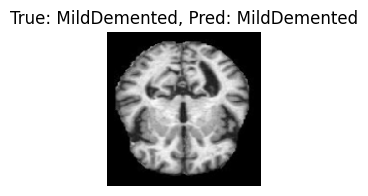

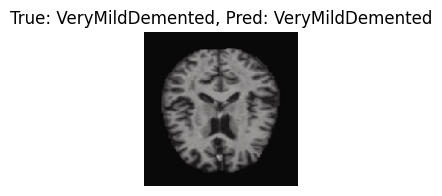

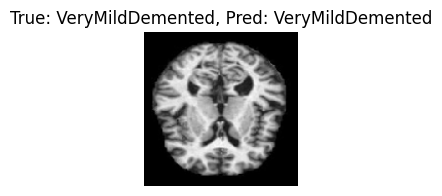

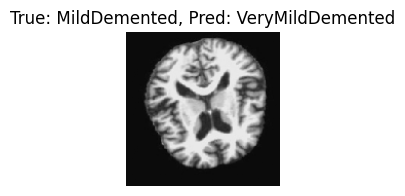

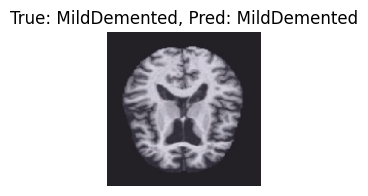

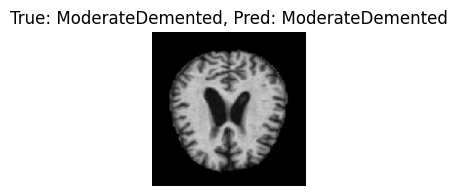

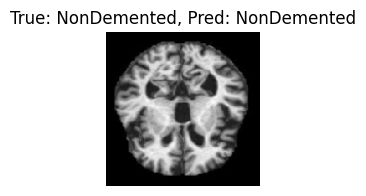

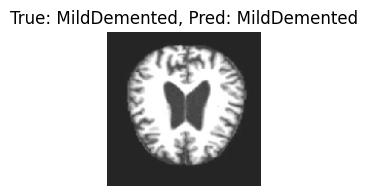

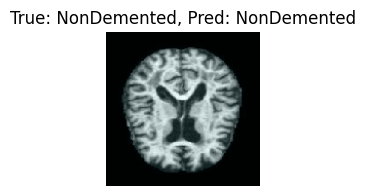

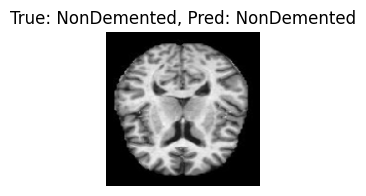

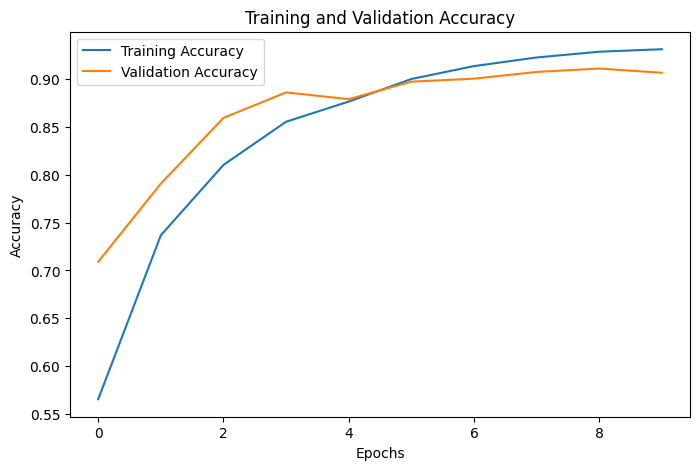

In [9]:
# Model Testing
test_images, test_labels = next(val_data)  # Extract a batch for prediction
predictions = model.predict(test_images)

# Display predictions
class_labels = list(train_data.class_indices.keys())  # Get the class labels

for i in range(10):  # Show 10 predictions
    plt.figure(figsize=(2, 2))
    plt.imshow(test_images[i])
    plt.title(f"True: {class_labels[np.argmax(test_labels[i])]}, Pred: {class_labels[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()

# Plot Training Accuracy vs Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()